In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt

from cv_svm import SVM_smooth

#import matplotlib
#matplotlib.use("pgf")
#matplotlib.rcParams.update({
#    "pgf.texsystem": "pdflatex",
#    'font.family': 'serif',
#    'text.usetex': True,
#    'pgf.rcfonts': False,
#})

In [2]:
X, y = load_breast_cancer(return_X_y=True)
#X, y = make_classification(n_samples=250, n_features=50)
n = X.shape[0]
p = X.shape[1]
y[np.where(y == 0)] = -1

In [3]:
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled.shape)

(569, 30)


In [4]:
clf = SVC(kernel='linear')
clf.fit(X_scaled, y)
sk_coef = clf.coef_/np.linalg.norm(clf.coef_)
print(clf.coef_)
print(clf.intercept_)

[[-0.32157975 -0.0963414  -0.29618472 -0.27044914  0.0145657   0.61925944
  -0.75749079 -0.90968508 -0.07847361  0.34800574 -0.84095245  0.30550603
  -0.23541953 -0.89135374 -0.35509455  0.39115374  0.37739417 -0.46041889
   0.10093298  0.88583541 -0.59013908 -0.97190388 -0.33349947 -0.71227359
  -0.42708268  0.1721726  -1.03818882 -0.09378355 -0.44679874 -0.85526809]]
[0.04438971]


In [5]:
y_pred = clf.predict(X_scaled)
accuracy_score(y, y_pred)

0.9876977152899824

In [20]:
clf = SVM_smooth(sigma=2e-1, lbd=1e-1)
clf.fit(X_scaled, y, thresh=1e-3, n_iter=3500, eta=0.5/n,
        approx_cv=True, cv=True, log_iter=True, log_iacv=True,
        save_cond_nums=True, save_err_approx=True)
print(f"grad {np.linalg.norm(clf.nabla_fgd_(clf.weights_, X_scaled, y, clf.sigma_, clf.lbd_))}")
coef = clf.weights_/np.linalg.norm(clf.weights_)
print(f"diff {np.mean(np.abs(coef - sk_coef))} | pct {np.mean(np.abs(coef - sk_coef))/np.sum(np.abs(coef))}")

y_pred = clf.predict(X_scaled)
accuracy_score(y, y_pred)

iter 0 | grad 2.79731 | objective 1.00990 IACV: 0.00000000 | baseline: 0.00245378
iter 1 | grad 2.79645 | objective 1.00315 IACV: 0.00000022 | baseline: 0.00244873
iter 2 | grad 2.79556 | objective 0.99640 IACV: 0.00000065 | baseline: 0.00244368
iter 3 | grad 2.79465 | objective 0.98966 IACV: 0.00000130 | baseline: 0.00243861
iter 4 | grad 2.79370 | objective 0.98291 IACV: 0.00000216 | baseline: 0.00243354
iter 5 | grad 2.79272 | objective 0.97618 IACV: 0.00000324 | baseline: 0.00242845
iter 6 | grad 2.79169 | objective 0.96944 IACV: 0.00000454 | baseline: 0.00242334
iter 7 | grad 2.79063 | objective 0.96272 IACV: 0.00000605 | baseline: 0.00241822
iter 8 | grad 2.78951 | objective 0.95599 IACV: 0.00000777 | baseline: 0.00241307
iter 9 | grad 2.78834 | objective 0.94927 IACV: 0.00000972 | baseline: 0.00240789
iter 10 | grad 2.78711 | objective 0.94256 IACV: 0.00001187 | baseline: 0.00240268
iter 11 | grad 2.78582 | objective 0.93585 IACV: 0.00001425 | baseline: 0.00239743
iter 12 | grad

iter 100 | grad 1.77830 | objective 0.49821 IACV: 0.00088506 | baseline: 0.00131461
iter 101 | grad 1.76513 | objective 0.49548 IACV: 0.00089889 | baseline: 0.00130365
iter 102 | grad 1.75202 | objective 0.49280 IACV: 0.00091276 | baseline: 0.00129283
iter 103 | grad 1.73898 | objective 0.49016 IACV: 0.00092664 | baseline: 0.00128215
iter 104 | grad 1.72600 | objective 0.48755 IACV: 0.00094056 | baseline: 0.00127162
iter 105 | grad 1.71309 | objective 0.48499 IACV: 0.00095449 | baseline: 0.00126123
iter 106 | grad 1.70025 | objective 0.48246 IACV: 0.00096845 | baseline: 0.00125098
iter 107 | grad 1.68748 | objective 0.47997 IACV: 0.00098243 | baseline: 0.00124089
iter 108 | grad 1.67479 | objective 0.47752 IACV: 0.00099644 | baseline: 0.00123094
iter 109 | grad 1.66218 | objective 0.47510 IACV: 0.00101046 | baseline: 0.00122116
iter 110 | grad 1.64964 | objective 0.47272 IACV: 0.00102451 | baseline: 0.00121153
iter 111 | grad 1.63720 | objective 0.47038 IACV: 0.00103857 | baseline: 0.0

iter 200 | grad 0.95553 | objective 0.34972 IACV: 0.00244585 | baseline: 0.00098170
iter 201 | grad 0.95106 | objective 0.34894 IACV: 0.00246318 | baseline: 0.00098359
iter 202 | grad 0.94663 | objective 0.34816 IACV: 0.00248054 | baseline: 0.00098553
iter 203 | grad 0.94224 | objective 0.34739 IACV: 0.00249793 | baseline: 0.00098751
iter 204 | grad 0.93789 | objective 0.34662 IACV: 0.00251535 | baseline: 0.00098953
iter 205 | grad 0.93358 | objective 0.34587 IACV: 0.00253280 | baseline: 0.00099160
iter 206 | grad 0.92931 | objective 0.34512 IACV: 0.00255027 | baseline: 0.00099371
iter 207 | grad 0.92509 | objective 0.34437 IACV: 0.00256777 | baseline: 0.00099585
iter 208 | grad 0.92090 | objective 0.34364 IACV: 0.00258530 | baseline: 0.00099804
iter 209 | grad 0.91675 | objective 0.34291 IACV: 0.00260286 | baseline: 0.00100026
iter 210 | grad 0.91264 | objective 0.34218 IACV: 0.00262044 | baseline: 0.00100252
iter 211 | grad 0.90856 | objective 0.34146 IACV: 0.00263806 | baseline: 0.0

iter 300 | grad 0.65704 | objective 0.29570 IACV: 0.00432219 | baseline: 0.00127333
iter 301 | grad 0.65507 | objective 0.29532 IACV: 0.00434226 | baseline: 0.00127656
iter 302 | grad 0.65312 | objective 0.29495 IACV: 0.00436234 | baseline: 0.00127979
iter 303 | grad 0.65118 | objective 0.29458 IACV: 0.00438245 | baseline: 0.00128302
iter 304 | grad 0.64926 | objective 0.29422 IACV: 0.00440258 | baseline: 0.00128625
iter 305 | grad 0.64734 | objective 0.29385 IACV: 0.00442273 | baseline: 0.00128948
iter 306 | grad 0.64544 | objective 0.29349 IACV: 0.00444289 | baseline: 0.00129271
iter 307 | grad 0.64355 | objective 0.29313 IACV: 0.00446308 | baseline: 0.00129593
iter 308 | grad 0.64167 | objective 0.29277 IACV: 0.00448328 | baseline: 0.00129916
iter 309 | grad 0.63981 | objective 0.29242 IACV: 0.00450351 | baseline: 0.00130238
iter 310 | grad 0.63795 | objective 0.29206 IACV: 0.00452375 | baseline: 0.00130560
iter 311 | grad 0.63611 | objective 0.29171 IACV: 0.00454401 | baseline: 0.0

iter 400 | grad 0.50799 | objective 0.26679 IACV: 0.00641517 | baseline: 0.00158419
iter 401 | grad 0.50686 | objective 0.26656 IACV: 0.00643693 | baseline: 0.00158714
iter 402 | grad 0.50575 | objective 0.26634 IACV: 0.00645872 | baseline: 0.00159008
iter 403 | grad 0.50464 | objective 0.26612 IACV: 0.00648051 | baseline: 0.00159302
iter 404 | grad 0.50353 | objective 0.26590 IACV: 0.00650233 | baseline: 0.00159595
iter 405 | grad 0.50243 | objective 0.26568 IACV: 0.00652416 | baseline: 0.00159888
iter 406 | grad 0.50134 | objective 0.26546 IACV: 0.00654601 | baseline: 0.00160181
iter 407 | grad 0.50025 | objective 0.26524 IACV: 0.00656787 | baseline: 0.00160473
iter 408 | grad 0.49916 | objective 0.26502 IACV: 0.00658975 | baseline: 0.00160765
iter 409 | grad 0.49809 | objective 0.26480 IACV: 0.00661165 | baseline: 0.00161057
iter 410 | grad 0.49701 | objective 0.26459 IACV: 0.00663357 | baseline: 0.00161348
iter 411 | grad 0.49594 | objective 0.26437 IACV: 0.00665550 | baseline: 0.0

iter 500 | grad 0.41816 | objective 0.24829 IACV: 0.00867211 | baseline: 0.00186228
iter 501 | grad 0.41745 | objective 0.24814 IACV: 0.00869547 | baseline: 0.00186491
iter 502 | grad 0.41674 | objective 0.24798 IACV: 0.00871885 | baseline: 0.00186753
iter 503 | grad 0.41602 | objective 0.24783 IACV: 0.00874223 | baseline: 0.00187015
iter 504 | grad 0.41532 | objective 0.24768 IACV: 0.00876564 | baseline: 0.00187277
iter 505 | grad 0.41461 | objective 0.24753 IACV: 0.00878905 | baseline: 0.00187538
iter 506 | grad 0.41391 | objective 0.24738 IACV: 0.00881248 | baseline: 0.00187800
iter 507 | grad 0.41321 | objective 0.24723 IACV: 0.00883593 | baseline: 0.00188061
iter 508 | grad 0.41251 | objective 0.24708 IACV: 0.00885939 | baseline: 0.00188321
iter 509 | grad 0.41182 | objective 0.24693 IACV: 0.00888287 | baseline: 0.00188582
iter 510 | grad 0.41113 | objective 0.24678 IACV: 0.00890635 | baseline: 0.00188842
iter 511 | grad 0.41044 | objective 0.24664 IACV: 0.00892986 | baseline: 0.0

iter 599 | grad 0.35846 | objective 0.23526 IACV: 0.01104948 | baseline: 0.00211003
iter 600 | grad 0.35795 | objective 0.23515 IACV: 0.01107408 | baseline: 0.00211242
iter 601 | grad 0.35744 | objective 0.23504 IACV: 0.01109869 | baseline: 0.00211480
iter 602 | grad 0.35693 | objective 0.23492 IACV: 0.01112332 | baseline: 0.00211719
iter 603 | grad 0.35643 | objective 0.23481 IACV: 0.01114795 | baseline: 0.00211957
iter 604 | grad 0.35592 | objective 0.23470 IACV: 0.01117259 | baseline: 0.00212195
iter 605 | grad 0.35542 | objective 0.23459 IACV: 0.01119725 | baseline: 0.00212433
iter 606 | grad 0.35492 | objective 0.23448 IACV: 0.01122191 | baseline: 0.00212670
iter 607 | grad 0.35441 | objective 0.23437 IACV: 0.01124658 | baseline: 0.00212907
iter 608 | grad 0.35391 | objective 0.23426 IACV: 0.01127126 | baseline: 0.00213145
iter 609 | grad 0.35342 | objective 0.23415 IACV: 0.01129596 | baseline: 0.00213381
iter 610 | grad 0.35292 | objective 0.23404 IACV: 0.01132066 | baseline: 0.0

iter 699 | grad 0.31336 | objective 0.22532 IACV: 0.01355394 | baseline: 0.00233934
iter 700 | grad 0.31296 | objective 0.22523 IACV: 0.01357941 | baseline: 0.00234154
iter 701 | grad 0.31257 | objective 0.22514 IACV: 0.01360489 | baseline: 0.00234374
iter 702 | grad 0.31217 | objective 0.22506 IACV: 0.01363037 | baseline: 0.00234595
iter 703 | grad 0.31178 | objective 0.22497 IACV: 0.01365587 | baseline: 0.00234815
iter 704 | grad 0.31138 | objective 0.22488 IACV: 0.01368137 | baseline: 0.00235034
iter 705 | grad 0.31099 | objective 0.22480 IACV: 0.01370688 | baseline: 0.00235254
iter 706 | grad 0.31060 | objective 0.22471 IACV: 0.01373240 | baseline: 0.00235474
iter 707 | grad 0.31021 | objective 0.22462 IACV: 0.01375793 | baseline: 0.00235693
iter 708 | grad 0.30982 | objective 0.22454 IACV: 0.01378346 | baseline: 0.00235912
iter 709 | grad 0.30944 | objective 0.22445 IACV: 0.01380901 | baseline: 0.00236131
iter 710 | grad 0.30905 | objective 0.22437 IACV: 0.01383456 | baseline: 0.0

iter 799 | grad 0.27835 | objective 0.21753 IACV: 0.01614479 | baseline: 0.00255260
iter 800 | grad 0.27804 | objective 0.21746 IACV: 0.01617115 | baseline: 0.00255466
iter 801 | grad 0.27773 | objective 0.21739 IACV: 0.01619752 | baseline: 0.00255672
iter 802 | grad 0.27743 | objective 0.21733 IACV: 0.01622389 | baseline: 0.00255879
iter 803 | grad 0.27712 | objective 0.21726 IACV: 0.01625028 | baseline: 0.00256085
iter 804 | grad 0.27682 | objective 0.21719 IACV: 0.01627667 | baseline: 0.00256291
iter 805 | grad 0.27652 | objective 0.21712 IACV: 0.01630307 | baseline: 0.00256497
iter 806 | grad 0.27621 | objective 0.21705 IACV: 0.01632948 | baseline: 0.00256702
iter 807 | grad 0.27591 | objective 0.21698 IACV: 0.01635590 | baseline: 0.00256908
iter 808 | grad 0.27561 | objective 0.21691 IACV: 0.01638232 | baseline: 0.00257114
iter 809 | grad 0.27531 | objective 0.21685 IACV: 0.01640875 | baseline: 0.00257319
iter 810 | grad 0.27501 | objective 0.21678 IACV: 0.01643520 | baseline: 0.0

iter 899 | grad 0.25078 | objective 0.21125 IACV: 0.01881758 | baseline: 0.00275339
iter 900 | grad 0.25053 | objective 0.21119 IACV: 0.01884463 | baseline: 0.00275535
iter 901 | grad 0.25028 | objective 0.21113 IACV: 0.01887170 | baseline: 0.00275730
iter 902 | grad 0.25003 | objective 0.21108 IACV: 0.01889876 | baseline: 0.00275925
iter 903 | grad 0.24978 | objective 0.21102 IACV: 0.01892584 | baseline: 0.00276120
iter 904 | grad 0.24954 | objective 0.21096 IACV: 0.01895291 | baseline: 0.00276315
iter 905 | grad 0.24929 | objective 0.21091 IACV: 0.01898000 | baseline: 0.00276510
iter 906 | grad 0.24905 | objective 0.21085 IACV: 0.01900708 | baseline: 0.00276705
iter 907 | grad 0.24880 | objective 0.21079 IACV: 0.01903418 | baseline: 0.00276900
iter 908 | grad 0.24856 | objective 0.21074 IACV: 0.01906128 | baseline: 0.00277094
iter 909 | grad 0.24831 | objective 0.21068 IACV: 0.01908839 | baseline: 0.00277289
iter 910 | grad 0.24807 | objective 0.21063 IACV: 0.01911550 | baseline: 0.0

iter 999 | grad 0.22798 | objective 0.20605 IACV: 0.02154947 | baseline: 0.00294409
iter 1000 | grad 0.22777 | objective 0.20600 IACV: 0.02157705 | baseline: 0.00294595
iter 1001 | grad 0.22756 | objective 0.20595 IACV: 0.02160464 | baseline: 0.00294781
iter 1002 | grad 0.22735 | objective 0.20590 IACV: 0.02163224 | baseline: 0.00294967
iter 1003 | grad 0.22714 | objective 0.20586 IACV: 0.02165983 | baseline: 0.00295153
iter 1004 | grad 0.22694 | objective 0.20581 IACV: 0.02168744 | baseline: 0.00295339
iter 1005 | grad 0.22673 | objective 0.20576 IACV: 0.02171505 | baseline: 0.00295524
iter 1006 | grad 0.22652 | objective 0.20572 IACV: 0.02174267 | baseline: 0.00295710
iter 1007 | grad 0.22632 | objective 0.20567 IACV: 0.02177029 | baseline: 0.00295896
iter 1008 | grad 0.22611 | objective 0.20562 IACV: 0.02179791 | baseline: 0.00296081
iter 1009 | grad 0.22591 | objective 0.20558 IACV: 0.02182555 | baseline: 0.00296267
iter 1010 | grad 0.22570 | objective 0.20553 IACV: 0.02185319 | ba

iter 1098 | grad 0.20890 | objective 0.20172 IACV: 0.02430812 | baseline: 0.00312454
iter 1099 | grad 0.20872 | objective 0.20168 IACV: 0.02433629 | baseline: 0.00312632
iter 1100 | grad 0.20854 | objective 0.20164 IACV: 0.02436447 | baseline: 0.00312811
iter 1101 | grad 0.20836 | objective 0.20160 IACV: 0.02439265 | baseline: 0.00312989
iter 1102 | grad 0.20819 | objective 0.20156 IACV: 0.02442084 | baseline: 0.00313167
iter 1103 | grad 0.20801 | objective 0.20152 IACV: 0.02444904 | baseline: 0.00313346
iter 1104 | grad 0.20784 | objective 0.20148 IACV: 0.02447724 | baseline: 0.00313524
iter 1105 | grad 0.20766 | objective 0.20144 IACV: 0.02450545 | baseline: 0.00313702
iter 1106 | grad 0.20749 | objective 0.20140 IACV: 0.02453366 | baseline: 0.00313880
iter 1107 | grad 0.20731 | objective 0.20136 IACV: 0.02456189 | baseline: 0.00314058
iter 1108 | grad 0.20714 | objective 0.20132 IACV: 0.02459012 | baseline: 0.00314236
iter 1109 | grad 0.20696 | objective 0.20128 IACV: 0.02461835 | b

iter 1198 | grad 0.19247 | objective 0.19799 IACV: 0.02715819 | baseline: 0.00329968
iter 1199 | grad 0.19232 | objective 0.19795 IACV: 0.02718703 | baseline: 0.00330139
iter 1200 | grad 0.19216 | objective 0.19792 IACV: 0.02721588 | baseline: 0.00330311
iter 1201 | grad 0.19201 | objective 0.19788 IACV: 0.02724473 | baseline: 0.00330483
iter 1202 | grad 0.19186 | objective 0.19785 IACV: 0.02727360 | baseline: 0.00330655
iter 1203 | grad 0.19171 | objective 0.19781 IACV: 0.02730247 | baseline: 0.00330826
iter 1204 | grad 0.19156 | objective 0.19778 IACV: 0.02733134 | baseline: 0.00330998
iter 1205 | grad 0.19141 | objective 0.19774 IACV: 0.02736023 | baseline: 0.00331169
iter 1206 | grad 0.19126 | objective 0.19771 IACV: 0.02738911 | baseline: 0.00331341
iter 1207 | grad 0.19111 | objective 0.19768 IACV: 0.02741801 | baseline: 0.00331512
iter 1208 | grad 0.19096 | objective 0.19764 IACV: 0.02744691 | baseline: 0.00331684
iter 1209 | grad 0.19081 | objective 0.19761 IACV: 0.02747582 | b

iter 1298 | grad 0.17830 | objective 0.19477 IACV: 0.03007603 | baseline: 0.00346868
iter 1299 | grad 0.17817 | objective 0.19474 IACV: 0.03010555 | baseline: 0.00347035
iter 1300 | grad 0.17804 | objective 0.19471 IACV: 0.03013509 | baseline: 0.00347201
iter 1301 | grad 0.17791 | objective 0.19468 IACV: 0.03016463 | baseline: 0.00347367
iter 1302 | grad 0.17777 | objective 0.19465 IACV: 0.03019417 | baseline: 0.00347533
iter 1303 | grad 0.17764 | objective 0.19462 IACV: 0.03022373 | baseline: 0.00347699
iter 1304 | grad 0.17751 | objective 0.19459 IACV: 0.03025329 | baseline: 0.00347865
iter 1305 | grad 0.17738 | objective 0.19456 IACV: 0.03028286 | baseline: 0.00348031
iter 1306 | grad 0.17725 | objective 0.19453 IACV: 0.03031244 | baseline: 0.00348197
iter 1307 | grad 0.17712 | objective 0.19450 IACV: 0.03034203 | baseline: 0.00348363
iter 1308 | grad 0.17699 | objective 0.19447 IACV: 0.03037162 | baseline: 0.00348528
iter 1309 | grad 0.17686 | objective 0.19444 IACV: 0.03040122 | b

iter 1396 | grad 0.16632 | objective 0.19201 IACV: 0.03300569 | baseline: 0.00362924
iter 1397 | grad 0.16621 | objective 0.19198 IACV: 0.03303599 | baseline: 0.00363085
iter 1398 | grad 0.16610 | objective 0.19196 IACV: 0.03306628 | baseline: 0.00363247
iter 1399 | grad 0.16598 | objective 0.19193 IACV: 0.03309660 | baseline: 0.00363408
iter 1400 | grad 0.16587 | objective 0.19190 IACV: 0.03312691 | baseline: 0.00363569
iter 1401 | grad 0.16576 | objective 0.19188 IACV: 0.03315724 | baseline: 0.00363731
iter 1402 | grad 0.16565 | objective 0.19185 IACV: 0.03318758 | baseline: 0.00363892
iter 1403 | grad 0.16554 | objective 0.19183 IACV: 0.03321792 | baseline: 0.00364053
iter 1404 | grad 0.16542 | objective 0.19180 IACV: 0.03324828 | baseline: 0.00364215
iter 1405 | grad 0.16531 | objective 0.19177 IACV: 0.03327864 | baseline: 0.00364376
iter 1406 | grad 0.16520 | objective 0.19175 IACV: 0.03330901 | baseline: 0.00364537
iter 1407 | grad 0.16509 | objective 0.19172 IACV: 0.03333939 | b

iter 1496 | grad 0.15592 | objective 0.18952 IACV: 0.03607829 | baseline: 0.00378867
iter 1497 | grad 0.15583 | objective 0.18950 IACV: 0.03610945 | baseline: 0.00379024
iter 1498 | grad 0.15573 | objective 0.18948 IACV: 0.03614064 | baseline: 0.00379182
iter 1499 | grad 0.15564 | objective 0.18945 IACV: 0.03617182 | baseline: 0.00379339
iter 1500 | grad 0.15554 | objective 0.18943 IACV: 0.03620302 | baseline: 0.00379496
iter 1501 | grad 0.15544 | objective 0.18941 IACV: 0.03623423 | baseline: 0.00379654
iter 1502 | grad 0.15535 | objective 0.18938 IACV: 0.03626544 | baseline: 0.00379811
iter 1503 | grad 0.15525 | objective 0.18936 IACV: 0.03629666 | baseline: 0.00379968
iter 1504 | grad 0.15516 | objective 0.18934 IACV: 0.03632789 | baseline: 0.00380125
iter 1505 | grad 0.15507 | objective 0.18931 IACV: 0.03635914 | baseline: 0.00380282
iter 1506 | grad 0.15497 | objective 0.18929 IACV: 0.03639038 | baseline: 0.00380439
iter 1507 | grad 0.15488 | objective 0.18927 IACV: 0.03642164 | b

iter 1596 | grad 0.14699 | objective 0.18730 IACV: 0.03923610 | baseline: 0.00394427
iter 1597 | grad 0.14690 | objective 0.18728 IACV: 0.03926807 | baseline: 0.00394581
iter 1598 | grad 0.14682 | objective 0.18726 IACV: 0.03930003 | baseline: 0.00394734
iter 1599 | grad 0.14674 | objective 0.18724 IACV: 0.03933201 | baseline: 0.00394888
iter 1600 | grad 0.14665 | objective 0.18722 IACV: 0.03936399 | baseline: 0.00395042
iter 1601 | grad 0.14657 | objective 0.18720 IACV: 0.03939597 | baseline: 0.00395196
iter 1602 | grad 0.14649 | objective 0.18717 IACV: 0.03942797 | baseline: 0.00395349
iter 1603 | grad 0.14640 | objective 0.18715 IACV: 0.03945997 | baseline: 0.00395503
iter 1604 | grad 0.14632 | objective 0.18713 IACV: 0.03949198 | baseline: 0.00395656
iter 1605 | grad 0.14624 | objective 0.18711 IACV: 0.03952400 | baseline: 0.00395810
iter 1606 | grad 0.14615 | objective 0.18709 IACV: 0.03955602 | baseline: 0.00395963
iter 1607 | grad 0.14607 | objective 0.18707 IACV: 0.03958805 | b

iter 1696 | grad 0.13894 | objective 0.18530 IACV: 0.04246026 | baseline: 0.00409640
iter 1697 | grad 0.13886 | objective 0.18528 IACV: 0.04249272 | baseline: 0.00409791
iter 1698 | grad 0.13879 | objective 0.18526 IACV: 0.04252519 | baseline: 0.00409941
iter 1699 | grad 0.13871 | objective 0.18524 IACV: 0.04255765 | baseline: 0.00410091
iter 1700 | grad 0.13863 | objective 0.18522 IACV: 0.04259012 | baseline: 0.00410242
iter 1701 | grad 0.13855 | objective 0.18520 IACV: 0.04262260 | baseline: 0.00410392
iter 1702 | grad 0.13847 | objective 0.18518 IACV: 0.04265508 | baseline: 0.00410542
iter 1703 | grad 0.13840 | objective 0.18516 IACV: 0.04268756 | baseline: 0.00410693
iter 1704 | grad 0.13832 | objective 0.18514 IACV: 0.04272004 | baseline: 0.00410843
iter 1705 | grad 0.13824 | objective 0.18513 IACV: 0.04275253 | baseline: 0.00410993
iter 1706 | grad 0.13816 | objective 0.18511 IACV: 0.04278502 | baseline: 0.00411143
iter 1707 | grad 0.13809 | objective 0.18509 IACV: 0.04281751 | b

iter 1796 | grad 0.13125 | objective 0.18348 IACV: 0.04571499 | baseline: 0.00424521
iter 1797 | grad 0.13117 | objective 0.18347 IACV: 0.04574757 | baseline: 0.00424668
iter 1798 | grad 0.13110 | objective 0.18345 IACV: 0.04578014 | baseline: 0.00424816
iter 1799 | grad 0.13102 | objective 0.18343 IACV: 0.04581271 | baseline: 0.00424963
iter 1800 | grad 0.13094 | objective 0.18342 IACV: 0.04584529 | baseline: 0.00425110
iter 1801 | grad 0.13087 | objective 0.18340 IACV: 0.04587786 | baseline: 0.00425257
iter 1802 | grad 0.13079 | objective 0.18338 IACV: 0.04591044 | baseline: 0.00425404
iter 1803 | grad 0.13072 | objective 0.18336 IACV: 0.04594301 | baseline: 0.00425551
iter 1804 | grad 0.13064 | objective 0.18335 IACV: 0.04597558 | baseline: 0.00425698
iter 1805 | grad 0.13056 | objective 0.18333 IACV: 0.04600815 | baseline: 0.00425844
iter 1806 | grad 0.13049 | objective 0.18331 IACV: 0.04604074 | baseline: 0.00425991
iter 1807 | grad 0.13041 | objective 0.18330 IACV: 0.04607330 | b

iter 1896 | grad 0.12379 | objective 0.18185 IACV: 0.04897196 | baseline: 0.00439079
iter 1897 | grad 0.12372 | objective 0.18183 IACV: 0.04900456 | baseline: 0.00439223
iter 1898 | grad 0.12365 | objective 0.18182 IACV: 0.04903715 | baseline: 0.00439367
iter 1899 | grad 0.12358 | objective 0.18180 IACV: 0.04906975 | baseline: 0.00439511
iter 1900 | grad 0.12350 | objective 0.18179 IACV: 0.04910235 | baseline: 0.00439655
iter 1901 | grad 0.12343 | objective 0.18177 IACV: 0.04913495 | baseline: 0.00439799
iter 1902 | grad 0.12336 | objective 0.18176 IACV: 0.04916755 | baseline: 0.00439943
iter 1903 | grad 0.12329 | objective 0.18174 IACV: 0.04920015 | baseline: 0.00440087
iter 1904 | grad 0.12322 | objective 0.18172 IACV: 0.04923277 | baseline: 0.00440230
iter 1905 | grad 0.12315 | objective 0.18171 IACV: 0.04926537 | baseline: 0.00440374
iter 1906 | grad 0.12307 | objective 0.18169 IACV: 0.04929798 | baseline: 0.00440518
iter 1907 | grad 0.12300 | objective 0.18168 IACV: 0.04933059 | b

iter 1996 | grad 0.11700 | objective 0.18037 IACV: 0.05224434 | baseline: 0.00453345
iter 1997 | grad 0.11694 | objective 0.18036 IACV: 0.05227725 | baseline: 0.00453486
iter 1998 | grad 0.11688 | objective 0.18034 IACV: 0.05231016 | baseline: 0.00453627
iter 1999 | grad 0.11682 | objective 0.18033 IACV: 0.05234307 | baseline: 0.00453769
iter 2000 | grad 0.11675 | objective 0.18031 IACV: 0.05237599 | baseline: 0.00453910
iter 2001 | grad 0.11669 | objective 0.18030 IACV: 0.05240892 | baseline: 0.00454051
iter 2002 | grad 0.11663 | objective 0.18029 IACV: 0.05244185 | baseline: 0.00454192
iter 2003 | grad 0.11656 | objective 0.18027 IACV: 0.05247478 | baseline: 0.00454333
iter 2004 | grad 0.11650 | objective 0.18026 IACV: 0.05250772 | baseline: 0.00454475
iter 2005 | grad 0.11644 | objective 0.18025 IACV: 0.05254066 | baseline: 0.00454616
iter 2006 | grad 0.11638 | objective 0.18023 IACV: 0.05257361 | baseline: 0.00454757
iter 2007 | grad 0.11631 | objective 0.18022 IACV: 0.05260657 | b

iter 2096 | grad 0.11113 | objective 0.17903 IACV: 0.05555885 | baseline: 0.00467361
iter 2097 | grad 0.11108 | objective 0.17901 IACV: 0.05559225 | baseline: 0.00467500
iter 2098 | grad 0.11102 | objective 0.17900 IACV: 0.05562565 | baseline: 0.00467639
iter 2099 | grad 0.11097 | objective 0.17899 IACV: 0.05565906 | baseline: 0.00467778
iter 2100 | grad 0.11092 | objective 0.17898 IACV: 0.05569247 | baseline: 0.00467917
iter 2101 | grad 0.11086 | objective 0.17896 IACV: 0.05572589 | baseline: 0.00468056
iter 2102 | grad 0.11081 | objective 0.17895 IACV: 0.05575932 | baseline: 0.00468195
iter 2103 | grad 0.11075 | objective 0.17894 IACV: 0.05579275 | baseline: 0.00468334
iter 2104 | grad 0.11070 | objective 0.17892 IACV: 0.05582618 | baseline: 0.00468472
iter 2105 | grad 0.11065 | objective 0.17891 IACV: 0.05585962 | baseline: 0.00468611
iter 2106 | grad 0.11059 | objective 0.17890 IACV: 0.05589307 | baseline: 0.00468750
iter 2107 | grad 0.11054 | objective 0.17889 IACV: 0.05592652 | b

iter 2195 | grad 0.10609 | objective 0.17780 IACV: 0.05888972 | baseline: 0.00481024
iter 2196 | grad 0.10604 | objective 0.17779 IACV: 0.05892361 | baseline: 0.00481161
iter 2197 | grad 0.10599 | objective 0.17778 IACV: 0.05895751 | baseline: 0.00481298
iter 2198 | grad 0.10595 | objective 0.17777 IACV: 0.05899140 | baseline: 0.00481435
iter 2199 | grad 0.10590 | objective 0.17776 IACV: 0.05902531 | baseline: 0.00481572
iter 2200 | grad 0.10585 | objective 0.17775 IACV: 0.05905923 | baseline: 0.00481708
iter 2201 | grad 0.10580 | objective 0.17773 IACV: 0.05909313 | baseline: 0.00481845
iter 2202 | grad 0.10576 | objective 0.17772 IACV: 0.05912706 | baseline: 0.00481982
iter 2203 | grad 0.10571 | objective 0.17771 IACV: 0.05916097 | baseline: 0.00482119
iter 2204 | grad 0.10566 | objective 0.17770 IACV: 0.05919490 | baseline: 0.00482256
iter 2205 | grad 0.10561 | objective 0.17769 IACV: 0.05922883 | baseline: 0.00482393
iter 2206 | grad 0.10557 | objective 0.17767 IACV: 0.05926278 | b

iter 2295 | grad 0.10157 | objective 0.17666 IACV: 0.06230124 | baseline: 0.00494633
iter 2296 | grad 0.10153 | objective 0.17665 IACV: 0.06233557 | baseline: 0.00494768
iter 2297 | grad 0.10149 | objective 0.17664 IACV: 0.06236990 | baseline: 0.00494903
iter 2298 | grad 0.10145 | objective 0.17663 IACV: 0.06240425 | baseline: 0.00495038
iter 2299 | grad 0.10140 | objective 0.17662 IACV: 0.06243859 | baseline: 0.00495173
iter 2300 | grad 0.10136 | objective 0.17661 IACV: 0.06247294 | baseline: 0.00495308
iter 2301 | grad 0.10132 | objective 0.17660 IACV: 0.06250729 | baseline: 0.00495443
iter 2302 | grad 0.10127 | objective 0.17658 IACV: 0.06254166 | baseline: 0.00495579
iter 2303 | grad 0.10123 | objective 0.17657 IACV: 0.06257601 | baseline: 0.00495714
iter 2304 | grad 0.10119 | objective 0.17656 IACV: 0.06261038 | baseline: 0.00495849
iter 2305 | grad 0.10115 | objective 0.17655 IACV: 0.06264476 | baseline: 0.00495984
iter 2306 | grad 0.10111 | objective 0.17654 IACV: 0.06267913 | b

iter 2395 | grad 0.09750 | objective 0.17560 IACV: 0.06575369 | baseline: 0.00508068
iter 2396 | grad 0.09746 | objective 0.17559 IACV: 0.06578840 | baseline: 0.00508201
iter 2397 | grad 0.09742 | objective 0.17558 IACV: 0.06582311 | baseline: 0.00508335
iter 2398 | grad 0.09738 | objective 0.17557 IACV: 0.06585782 | baseline: 0.00508468
iter 2399 | grad 0.09734 | objective 0.17556 IACV: 0.06589255 | baseline: 0.00508602
iter 2400 | grad 0.09730 | objective 0.17555 IACV: 0.06592726 | baseline: 0.00508735
iter 2401 | grad 0.09726 | objective 0.17554 IACV: 0.06596199 | baseline: 0.00508869
iter 2402 | grad 0.09722 | objective 0.17553 IACV: 0.06599671 | baseline: 0.00509002
iter 2403 | grad 0.09719 | objective 0.17552 IACV: 0.06603144 | baseline: 0.00509135
iter 2404 | grad 0.09715 | objective 0.17551 IACV: 0.06606618 | baseline: 0.00509269
iter 2405 | grad 0.09711 | objective 0.17550 IACV: 0.06610091 | baseline: 0.00509402
iter 2406 | grad 0.09707 | objective 0.17549 IACV: 0.06613565 | b

iter 2495 | grad 0.09376 | objective 0.17461 IACV: 0.06923956 | baseline: 0.00521344
iter 2496 | grad 0.09372 | objective 0.17460 IACV: 0.06927455 | baseline: 0.00521476
iter 2497 | grad 0.09369 | objective 0.17459 IACV: 0.06930956 | baseline: 0.00521608
iter 2498 | grad 0.09365 | objective 0.17458 IACV: 0.06934456 | baseline: 0.00521740
iter 2499 | grad 0.09362 | objective 0.17457 IACV: 0.06937957 | baseline: 0.00521872
iter 2500 | grad 0.09358 | objective 0.17456 IACV: 0.06941459 | baseline: 0.00522004
iter 2501 | grad 0.09354 | objective 0.17455 IACV: 0.06944960 | baseline: 0.00522136
iter 2502 | grad 0.09351 | objective 0.17454 IACV: 0.06948461 | baseline: 0.00522268
iter 2503 | grad 0.09347 | objective 0.17453 IACV: 0.06951962 | baseline: 0.00522400
iter 2504 | grad 0.09344 | objective 0.17452 IACV: 0.06955464 | baseline: 0.00522532
iter 2505 | grad 0.09340 | objective 0.17451 IACV: 0.06958967 | baseline: 0.00522664
iter 2506 | grad 0.09337 | objective 0.17450 IACV: 0.06962469 | b

iter 2595 | grad 0.09029 | objective 0.17367 IACV: 0.07275043 | baseline: 0.00534475
iter 2596 | grad 0.09026 | objective 0.17367 IACV: 0.07278563 | baseline: 0.00534605
iter 2597 | grad 0.09023 | objective 0.17366 IACV: 0.07282084 | baseline: 0.00534736
iter 2598 | grad 0.09019 | objective 0.17365 IACV: 0.07285605 | baseline: 0.00534867
iter 2599 | grad 0.09016 | objective 0.17364 IACV: 0.07289126 | baseline: 0.00534997
iter 2600 | grad 0.09013 | objective 0.17363 IACV: 0.07292646 | baseline: 0.00535128
iter 2601 | grad 0.09009 | objective 0.17362 IACV: 0.07296168 | baseline: 0.00535258
iter 2602 | grad 0.09006 | objective 0.17361 IACV: 0.07299689 | baseline: 0.00535389
iter 2603 | grad 0.09003 | objective 0.17360 IACV: 0.07303211 | baseline: 0.00535519
iter 2604 | grad 0.08999 | objective 0.17359 IACV: 0.07306733 | baseline: 0.00535650
iter 2605 | grad 0.08996 | objective 0.17359 IACV: 0.07310255 | baseline: 0.00535780
iter 2606 | grad 0.08993 | objective 0.17358 IACV: 0.07313776 | b

iter 2695 | grad 0.08705 | objective 0.17280 IACV: 0.07627718 | baseline: 0.00547470
iter 2696 | grad 0.08702 | objective 0.17279 IACV: 0.07631250 | baseline: 0.00547599
iter 2697 | grad 0.08698 | objective 0.17278 IACV: 0.07634782 | baseline: 0.00547729
iter 2698 | grad 0.08695 | objective 0.17278 IACV: 0.07638314 | baseline: 0.00547858
iter 2699 | grad 0.08692 | objective 0.17277 IACV: 0.07641846 | baseline: 0.00547987
iter 2700 | grad 0.08689 | objective 0.17276 IACV: 0.07645378 | baseline: 0.00548116
iter 2701 | grad 0.08686 | objective 0.17275 IACV: 0.07648908 | baseline: 0.00548246
iter 2702 | grad 0.08683 | objective 0.17274 IACV: 0.07652441 | baseline: 0.00548375
iter 2703 | grad 0.08680 | objective 0.17273 IACV: 0.07655973 | baseline: 0.00548504
iter 2704 | grad 0.08676 | objective 0.17272 IACV: 0.07659505 | baseline: 0.00548633
iter 2705 | grad 0.08673 | objective 0.17272 IACV: 0.07663037 | baseline: 0.00548763
iter 2706 | grad 0.08670 | objective 0.17271 IACV: 0.07666569 | b

iter 2795 | grad 0.08398 | objective 0.17198 IACV: 0.07981019 | baseline: 0.00560339
iter 2796 | grad 0.08395 | objective 0.17197 IACV: 0.07984553 | baseline: 0.00560467
iter 2797 | grad 0.08392 | objective 0.17196 IACV: 0.07988086 | baseline: 0.00560595
iter 2798 | grad 0.08389 | objective 0.17195 IACV: 0.07991618 | baseline: 0.00560723
iter 2799 | grad 0.08386 | objective 0.17195 IACV: 0.07995151 | baseline: 0.00560851
iter 2800 | grad 0.08383 | objective 0.17194 IACV: 0.07998684 | baseline: 0.00560979
iter 2801 | grad 0.08380 | objective 0.17193 IACV: 0.08002216 | baseline: 0.00561107
iter 2802 | grad 0.08377 | objective 0.17192 IACV: 0.08005749 | baseline: 0.00561235
iter 2803 | grad 0.08374 | objective 0.17191 IACV: 0.08009282 | baseline: 0.00561363
iter 2804 | grad 0.08371 | objective 0.17191 IACV: 0.08012814 | baseline: 0.00561491
iter 2805 | grad 0.08368 | objective 0.17190 IACV: 0.08016346 | baseline: 0.00561619
iter 2806 | grad 0.08365 | objective 0.17189 IACV: 0.08019879 | b

iter 2895 | grad 0.08106 | objective 0.17120 IACV: 0.08333962 | baseline: 0.00573088
iter 2896 | grad 0.08103 | objective 0.17119 IACV: 0.08337486 | baseline: 0.00573215
iter 2897 | grad 0.08100 | objective 0.17119 IACV: 0.08341010 | baseline: 0.00573342
iter 2898 | grad 0.08098 | objective 0.17118 IACV: 0.08344533 | baseline: 0.00573469
iter 2899 | grad 0.08095 | objective 0.17117 IACV: 0.08348058 | baseline: 0.00573596
iter 2900 | grad 0.08092 | objective 0.17116 IACV: 0.08351582 | baseline: 0.00573722
iter 2901 | grad 0.08089 | objective 0.17116 IACV: 0.08355106 | baseline: 0.00573849
iter 2902 | grad 0.08086 | objective 0.17115 IACV: 0.08358629 | baseline: 0.00573976
iter 2903 | grad 0.08083 | objective 0.17114 IACV: 0.08362152 | baseline: 0.00574103
iter 2904 | grad 0.08080 | objective 0.17113 IACV: 0.08365675 | baseline: 0.00574230
iter 2905 | grad 0.08078 | objective 0.17113 IACV: 0.08369198 | baseline: 0.00574357
iter 2906 | grad 0.08075 | objective 0.17112 IACV: 0.08372722 | b

iter 2993 | grad 0.07832 | objective 0.17048 IACV: 0.08678573 | baseline: 0.00585472
iter 2994 | grad 0.07829 | objective 0.17048 IACV: 0.08682080 | baseline: 0.00585598
iter 2995 | grad 0.07827 | objective 0.17047 IACV: 0.08685587 | baseline: 0.00585723
iter 2996 | grad 0.07824 | objective 0.17046 IACV: 0.08689094 | baseline: 0.00585849
iter 2997 | grad 0.07821 | objective 0.17046 IACV: 0.08692599 | baseline: 0.00585975
iter 2998 | grad 0.07818 | objective 0.17045 IACV: 0.08696105 | baseline: 0.00586101
iter 2999 | grad 0.07816 | objective 0.17044 IACV: 0.08699612 | baseline: 0.00586226
iter 3000 | grad 0.07813 | objective 0.17043 IACV: 0.08703117 | baseline: 0.00586352
iter 3001 | grad 0.07810 | objective 0.17043 IACV: 0.08706622 | baseline: 0.00586478
iter 3002 | grad 0.07808 | objective 0.17042 IACV: 0.08710127 | baseline: 0.00586604
iter 3003 | grad 0.07805 | objective 0.17041 IACV: 0.08713633 | baseline: 0.00586729
iter 3004 | grad 0.07802 | objective 0.17041 IACV: 0.08717137 | b

iter 3093 | grad 0.07563 | objective 0.16979 IACV: 0.09028074 | baseline: 0.00598000
iter 3094 | grad 0.07561 | objective 0.16979 IACV: 0.09031557 | baseline: 0.00598125
iter 3095 | grad 0.07558 | objective 0.16978 IACV: 0.09035037 | baseline: 0.00598250
iter 3096 | grad 0.07555 | objective 0.16977 IACV: 0.09038519 | baseline: 0.00598375
iter 3097 | grad 0.07553 | objective 0.16977 IACV: 0.09042000 | baseline: 0.00598499
iter 3098 | grad 0.07550 | objective 0.16976 IACV: 0.09045480 | baseline: 0.00598624
iter 3099 | grad 0.07548 | objective 0.16975 IACV: 0.09048960 | baseline: 0.00598749
iter 3100 | grad 0.07545 | objective 0.16975 IACV: 0.09052440 | baseline: 0.00598873
iter 3101 | grad 0.07542 | objective 0.16974 IACV: 0.09055920 | baseline: 0.00598998
iter 3102 | grad 0.07540 | objective 0.16973 IACV: 0.09059399 | baseline: 0.00599123
iter 3103 | grad 0.07537 | objective 0.16973 IACV: 0.09062877 | baseline: 0.00599247
iter 3104 | grad 0.07534 | objective 0.16972 IACV: 0.09066356 | b

iter 3193 | grad 0.07305 | objective 0.16914 IACV: 0.09374732 | baseline: 0.00610424
iter 3194 | grad 0.07302 | objective 0.16913 IACV: 0.09378183 | baseline: 0.00610548
iter 3195 | grad 0.07299 | objective 0.16913 IACV: 0.09381633 | baseline: 0.00610671
iter 3196 | grad 0.07297 | objective 0.16912 IACV: 0.09385082 | baseline: 0.00610795
iter 3197 | grad 0.07294 | objective 0.16911 IACV: 0.09388532 | baseline: 0.00610919
iter 3198 | grad 0.07292 | objective 0.16911 IACV: 0.09391981 | baseline: 0.00611043
iter 3199 | grad 0.07289 | objective 0.16910 IACV: 0.09395430 | baseline: 0.00611166
iter 3200 | grad 0.07287 | objective 0.16909 IACV: 0.09398878 | baseline: 0.00611290
iter 3201 | grad 0.07284 | objective 0.16909 IACV: 0.09402327 | baseline: 0.00611414
iter 3202 | grad 0.07282 | objective 0.16908 IACV: 0.09405775 | baseline: 0.00611537
iter 3203 | grad 0.07279 | objective 0.16908 IACV: 0.09409222 | baseline: 0.00611661
iter 3204 | grad 0.07277 | objective 0.16907 IACV: 0.09412669 | b

iter 3293 | grad 0.07055 | objective 0.16852 IACV: 0.09718098 | baseline: 0.00622747
iter 3294 | grad 0.07053 | objective 0.16852 IACV: 0.09721514 | baseline: 0.00622869
iter 3295 | grad 0.07050 | objective 0.16851 IACV: 0.09724931 | baseline: 0.00622992
iter 3296 | grad 0.07048 | objective 0.16850 IACV: 0.09728345 | baseline: 0.00623115
iter 3297 | grad 0.07045 | objective 0.16850 IACV: 0.09731761 | baseline: 0.00623237
iter 3298 | grad 0.07043 | objective 0.16849 IACV: 0.09735176 | baseline: 0.00623360
iter 3299 | grad 0.07040 | objective 0.16849 IACV: 0.09738591 | baseline: 0.00623483
iter 3300 | grad 0.07038 | objective 0.16848 IACV: 0.09742004 | baseline: 0.00623606
iter 3301 | grad 0.07035 | objective 0.16847 IACV: 0.09745418 | baseline: 0.00623728
iter 3302 | grad 0.07033 | objective 0.16847 IACV: 0.09748831 | baseline: 0.00623851
iter 3303 | grad 0.07031 | objective 0.16846 IACV: 0.09752245 | baseline: 0.00623973
iter 3304 | grad 0.07028 | objective 0.16846 IACV: 0.09755657 | b

iter 3393 | grad 0.06815 | objective 0.16794 IACV: 0.10057995 | baseline: 0.00634972
iter 3394 | grad 0.06812 | objective 0.16793 IACV: 0.10061376 | baseline: 0.00635093
iter 3395 | grad 0.06810 | objective 0.16793 IACV: 0.10064756 | baseline: 0.00635215
iter 3396 | grad 0.06808 | objective 0.16792 IACV: 0.10068138 | baseline: 0.00635337
iter 3397 | grad 0.06805 | objective 0.16792 IACV: 0.10071518 | baseline: 0.00635459
iter 3398 | grad 0.06803 | objective 0.16791 IACV: 0.10074899 | baseline: 0.00635580
iter 3399 | grad 0.06801 | objective 0.16790 IACV: 0.10078278 | baseline: 0.00635702
iter 3400 | grad 0.06798 | objective 0.16790 IACV: 0.10081658 | baseline: 0.00635824
iter 3401 | grad 0.06796 | objective 0.16789 IACV: 0.10085037 | baseline: 0.00635945
iter 3402 | grad 0.06794 | objective 0.16789 IACV: 0.10088415 | baseline: 0.00636067
iter 3403 | grad 0.06791 | objective 0.16788 IACV: 0.10091794 | baseline: 0.00636189
iter 3404 | grad 0.06789 | objective 0.16788 IACV: 0.10095172 | b

iter 3493 | grad 0.06584 | objective 0.16739 IACV: 0.10394490 | baseline: 0.00647102
iter 3494 | grad 0.06582 | objective 0.16738 IACV: 0.10397837 | baseline: 0.00647223
iter 3495 | grad 0.06579 | objective 0.16737 IACV: 0.10401186 | baseline: 0.00647344
iter 3496 | grad 0.06577 | objective 0.16737 IACV: 0.10404534 | baseline: 0.00647465
iter 3497 | grad 0.06575 | objective 0.16736 IACV: 0.10407881 | baseline: 0.00647586
iter 3498 | grad 0.06573 | objective 0.16736 IACV: 0.10411229 | baseline: 0.00647706
iter 3499 | grad 0.06570 | objective 0.16735 IACV: 0.10414576 | baseline: 0.00647827
grad 0.06568149044567174
diff 0.10873102717713382 | pct 0.02295747824570882


0.9718804920913884

In [21]:
iacv_coef = normalize(clf.loo_iacv_, axis=1)
true_coef = normalize(clf.loo_true_, axis=1)
print(np.mean(np.linalg.norm(iacv_coef - true_coef, 2, axis=1)))
print(np.mean(np.linalg.norm(coef - true_coef, 2, axis=1)))

0.02160038661942724
0.007349095734186966


In [22]:
print(iacv_coef)
print(true_coef)
print(clf.weights_)

[[-0.23891577 -0.21950944 -0.23613112 ... -0.24030758 -0.19623333
  -0.06876933]
 [-0.23364076 -0.2141835  -0.23188913 ... -0.23773022 -0.20271753
  -0.06533067]
 [-0.23568872 -0.2107999  -0.2335551  ... -0.2374409  -0.19927283
  -0.07104217]
 ...
 [-0.2359922  -0.20626794 -0.23369981 ... -0.23867343 -0.20476642
  -0.06909253]
 [-0.23601972 -0.20676431 -0.23341277 ... -0.24231187 -0.2007606
  -0.06866132]
 [-0.23193756 -0.21550013 -0.22982608 ... -0.23828542 -0.20419438
  -0.07021141]]
[[-0.23700731 -0.20597368 -0.23507085 ... -0.24199789 -0.19937225
  -0.07509195]
 [-0.2364648  -0.20609741 -0.23461042 ... -0.24192187 -0.19992126
  -0.07521645]
 [-0.23689822 -0.2057238  -0.23498086 ... -0.24194906 -0.19949101
  -0.07526374]
 ...
 [-0.23607242 -0.20115841 -0.23422332 ... -0.24194207 -0.20313916
  -0.0763492 ]
 [-0.23697179 -0.20558104 -0.23504081 ... -0.2420453  -0.19949431
  -0.07510612]
 [-0.23678753 -0.20600693 -0.23486709 ... -0.24190982 -0.19964698
  -0.07514722]]
[-0.19524752 -0.1

In [23]:
print(np.std(clf.loo_iacv_))
print(np.std(clf.loo_true_))

0.114741005
0.10091702833679538


In [24]:
print(np.mean(clf.loo_iacv_, axis=0))
print(np.mean(clf.loo_true_, axis=0))

[-0.21855415 -0.19546308 -0.2163925  -0.229671   -0.05993785 -0.06110842
 -0.17700742 -0.22614485 -0.06607854  0.09341435 -0.21159133 -0.00573638
 -0.18036488 -0.20257531 -0.04234521  0.06507977  0.06156895 -0.00074393
  0.00667923  0.10685186 -0.26931745 -0.24384344 -0.25843045 -0.26773965
 -0.18271354 -0.10802811 -0.15369084 -0.22142851 -0.18537389 -0.06361686]
[-0.19481649 -0.16906859 -0.19323921 -0.20498246 -0.05351088 -0.05905094
 -0.16008465 -0.20314494 -0.059856    0.07839699 -0.18820858 -0.00173746
 -0.16165216 -0.18043481 -0.03754949  0.0532159   0.05371918 -0.00209348
  0.00355741  0.09100571 -0.23976142 -0.21059475 -0.23057774 -0.23859937
 -0.16097467 -0.10011781 -0.13918685 -0.19901496 -0.16403965 -0.06185455]


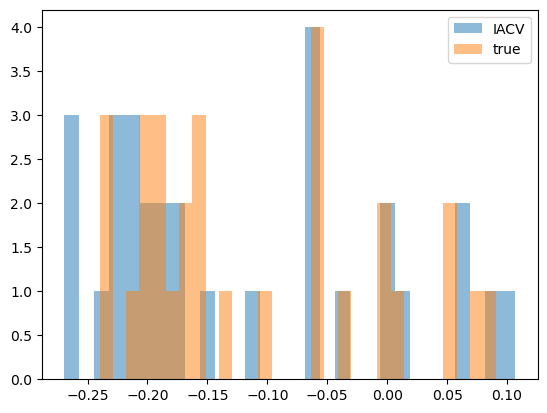

In [25]:
plt.hist(np.mean(clf.loo_iacv_, axis=0), alpha=0.5, bins=30, label="IACV")
plt.hist(np.mean(clf.loo_true_, axis=0), alpha=0.5, bins=30, label="true")
plt.legend()

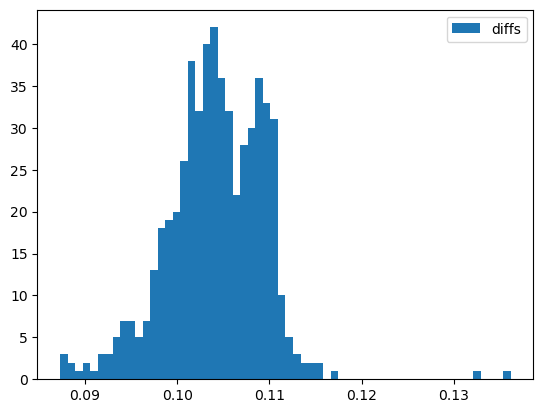

In [26]:
plt.hist(np.linalg.norm(clf.loo_iacv_ - clf.loo_true_, axis=1), bins=60, label="diffs")
plt.legend()

In [13]:
clf.loo_iacv_

Array([[-0.19023637, -0.17567775, -0.18854861, ..., -0.19233187,
        -0.15910213, -0.06754031],
       [-0.18628761, -0.17107229, -0.18548007, ..., -0.19065611,
        -0.1655071 , -0.06378278],
       [-0.18753956, -0.16802911, -0.1864267 , ..., -0.19013631,
        -0.162078  , -0.06900635],
       ...,
       [-0.1901909 , -0.16649844, -0.1888043 , ..., -0.19262488,
        -0.16896439, -0.06804208],
       [-0.18695165, -0.16470523, -0.18544292, ..., -0.19387174,
        -0.16296679, -0.06749845],
       [-0.18475276, -0.17264082, -0.1836933 , ..., -0.19165511,
        -0.16644159, -0.06894891]], dtype=float32)

In [14]:
clf.loo_true_

array([[-0.14368199, -0.1107293 , -0.14336155, ..., -0.15166877,
        -0.1145977 , -0.0562157 ],
       [-0.14297169, -0.11070904, -0.14272903, ..., -0.15138594,
        -0.11493754, -0.05625622],
       [-0.14355567, -0.11049054, -0.14325172, ..., -0.15159189,
        -0.11467065, -0.0563517 ],
       ...,
       [-0.14081133, -0.1019219 , -0.14063047, ..., -0.1501158 ,
        -0.11949148, -0.05772326],
       [-0.14364896, -0.11039384, -0.14333328, ..., -0.15170629,
        -0.11469909, -0.05622765],
       [-0.14347138, -0.11075884, -0.14316457, ..., -0.15157026,
        -0.11482242, -0.05625358]])

In [15]:
iacv_mean = np.mean(clf.loo_iacv_, axis=0)
coef = iacv_mean/np.linalg.norm(iacv_mean)
print(f"diff {np.mean(np.abs(coef - sk_coef))} | pct {np.mean(np.abs(coef - sk_coef))/np.sum(np.abs(coef))}")

diff 0.10684727132320404 | pct 0.02243790216743946


In [16]:
true_cv_mean = np.mean(clf.loo_true_, axis=0)
coef = true_cv_mean/np.linalg.norm(true_cv_mean)
print(f"diff {np.mean(np.abs(coef - sk_coef))} | pct {np.mean(np.abs(coef - sk_coef))/np.sum(np.abs(coef))}")

diff 0.11132369071221301 | pct 0.0235084418333159


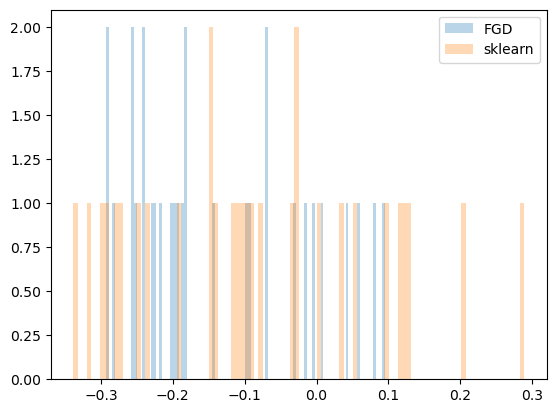

In [17]:
coef = clf.weights_/np.linalg.norm(clf.weights_)
nbin = 100
plt.hist(coef, bins=nbin, label="FGD", alpha=0.3)
plt.hist(sk_coef.flatten(), bins=nbin, label="sklearn", alpha=0.3)
plt.legend()
plt.show()

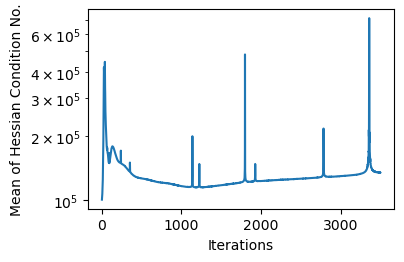

<Figure size 640x480 with 0 Axes>

In [18]:
fig, ax = plt.subplots()
ax.plot(np.mean(clf.cond_nums_, axis=1))
ax.set_yscale('log')
ax.set_xlabel("Iterations")
ax.set_ylabel("Mean of Hessian Condition No.")
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('svm_convergence_cond_no.pgf', bbox_inches='tight', pad_inches=0)

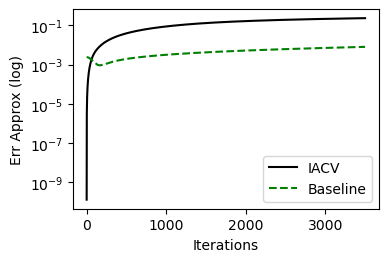

<Figure size 640x480 with 0 Axes>

In [19]:
fig, ax = plt.subplots()
ax.plot(clf.err_approx_["IACV"], label="IACV", c='black')
#ax.plot(clf.err_approx_["NS"], label="NS", c='red', linestyle="--")
ax.plot(clf.err_approx_["baseline"], label="Baseline", c='green', linestyle="--")
ax.set_yscale('log')
ax.set_xlabel("Iterations")
ax.set_ylabel("Err Approx (log)")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('svm_convergence_err_approx.pgf', bbox_inches='tight', pad_inches=0)